In [1]:
# Import the synthetic map of a star forming region from the Example folder
# (map comes from Koepferl et al. 2017; Koepferl & Robitaille 2017; Koepferl, Robitaille, & Dale 2017a,b)
from astropy.io import fits
filename = 'synthetic_map.fits'
image    = fits.open(filename)[0].data[0,:,:]

# Set the physical extent of the image [xmin, xmax, ymin, ymax]
extent   = [-15, 15, -15, 15]

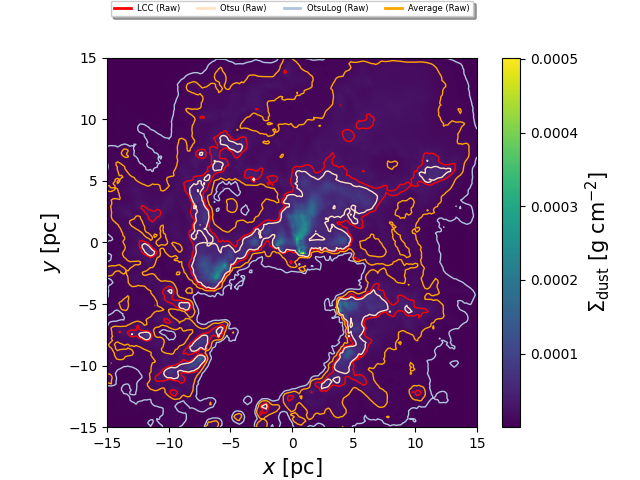

Button(description='Toggle Info Display', style=ButtonStyle())

Output()

In [2]:
# Set the path to the Contour Analysis Tool
import sys
path_to_ContourAnalysisTool = '../'
sys.path.append(path_to_ContourAnalysisTool)

# Import the Contour Analysis Tool and set up an interactive session named CAT 
import ContourAnalysisTool
CAT = ContourAnalysisTool.UserInterface(image, extent, # These are the only two required inputs
                                        interactive=True, # Sets up an interactive session
                                        xy_units='pc', # Sets the units for the x,y axes
                                        clabel='$\Sigma_{\\rm dust}$', # Sets the title for the colorbar
                                        cbar_units='$\\rm g \; cm^{-2}$', # Sets the units for the colorbar
                                        Nlevels=50) # Sets the number of contour levels and spacing
                                        # mask=custom_mask, # Option to mask the image with a pre-made mask
                                        # line_style=['-','dashed',':'], # Option to change the contour line styles
                                        # line_color=['y','g','purple',[0.2, 0.4, 0.8]]) # Option to change the contour colours

In [3]:
"""
 The contours, image, and plot can all be obtained programmatically using the following functions:
     CAT.find_contours_raw()
     CAT.find_contours_smoothed()
     CAT.find_contours_nobackground()
 Note defaults are set so no inputs are required

 However, we recommend using the inputs to keep track of which methods/parameters are being used.
 Additional information about the available inputs can be found by running the following:
     print(CAT.find_contours_raw.__doc__)
     print(CAT.find_contours_smoothed.__doc__)
     print(CAT.find_contours_nobackground.__doc__)
"""

# Default Raw Image Contours
level_raw,  image_raw,  plot_raw  = CAT.find_contours_raw(threshold=20.0, # Threshold % for the Average contour
                                                          selected_levels=['LCC', 'Otsu', 'OtsuLog', 'Average'], # Select which contours to calculate
                                                          selected_scaling='None', # Option to scale data (linear or logarithmic)
                                                          mask=None) # Option to mask the image (e.g. using a mask from an interactive session)
# Default Smoothed Image Contours
level_sm,   image_sm,   plot_smo  = CAT.find_contours_smoothed(threshold=20.0, # Threshold % for the Average contour
                                                               selected_levels=['LCC', 'Otsu', 'OtsuLog', 'Average'], # Select which contours to calculate
                                                               selected_scaling='None', # Option to scale data (linear or logarithmic)
                                                               selected_method='Gaussian', # Set the smoothing method (10 available options)
                                                               sigma=2.0, # Set the smoothing parameter specific to the Gaussian method
                                                               mask=None) # Option to mask the image (e.g. using a mask from an interactive session)
# Default No Background Image Contours
level_nobg, image_nobg, plot_nobg = CAT.find_contours_nobackground(threshold=20.0, # Threshold % for the Average contour
                                                                   selected_levels=['LCC', 'Otsu', 'OtsuLog', 'Average'], # Select which contours to calculate
                                                                   selected_scaling='None', # Option to scale data (linear or logarithmic)
                                                                   filter_shape='disk', # Option to select the filter shape (disk or square)
                                                                   filter_size=30, # Set the size of the filter
                                                                   pad_mode='reflect', # Option to select how the edges are handled (10 available options)
                                                                   mask=None) # Option to mask the image (e.g. using a mask from an interactive session)

{'LCC': 2.5622711198720822e-05, 'Otsu': 4.410976344695388e-05, 'OtsuLog': 3.4543278962667862e-06, 'Average': 1.073520773407142e-05, 'delta_levels': 5.023282253937975e-07}
Warning! Multiple matches detected:
==> ('bilateral', 57)
    ('bivariate spline', 48)


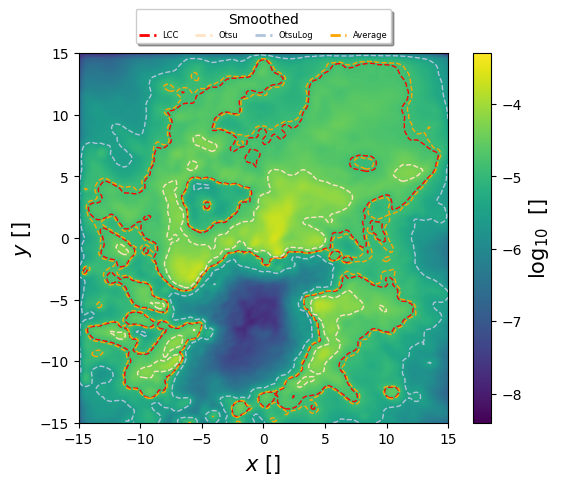

In [4]:
# It is also possible to bypass the interactive session completely
CAT = ContourAnalysisTool.UserInterface(image, extent)
level_raw, image_raw, plot_raw = CAT.find_contours_raw()
print(level_raw)

# Partial or misspelled inputs are also accepted. Misspelled 'bivar' identifies two potential opetions
# and defaults to the option with the highest likelihood score, in this case 'bilateral'.
level_sm, image_sm, plot_sm = CAT.find_contours_smoothed(selected_method='bivar', selected_scaling='Log')
plot_sm

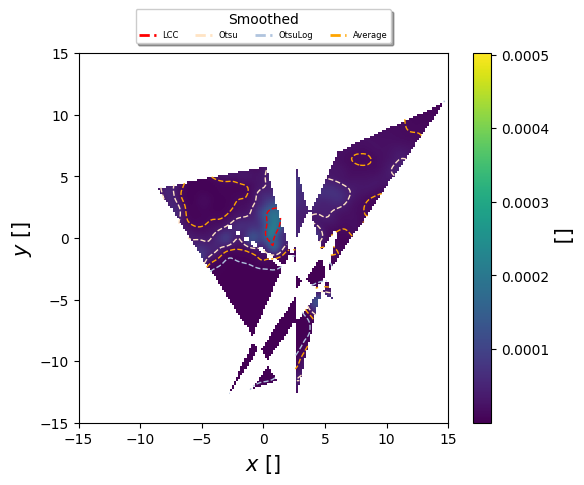

In [5]:
# Here is an example of how one might input their own custom mask
import numpy as np
from skimage.draw import polygon, line

# Function to generate a custom mask with an irregular shape
def generate_irregular_mask(image_shape):
    mask = np.zeros(image_shape, dtype=np.uint8)
    
    # Generate random vertices for the polygon
    num_vertices = 13  # Number of sides for the polygon
    vertices = []
    for _ in range(num_vertices):
        vertex_x = np.random.randint(0, image_shape[1])
        vertex_y = np.random.randint(0, image_shape[0])
        vertices.append([vertex_x, vertex_y])
    vertices = np.array(vertices)
    
    # Draw lines between vertices to create the polygon
    for i in range(num_vertices):
        start_point = vertices[i]
        end_point = vertices[(i + 1) % num_vertices]
        rr, cc = line(start_point[0], start_point[1], end_point[0], end_point[1])
        mask[rr, cc] = 255
    
    # Fill the polygon
    fill_coords = np.array(vertices)
    rr, cc = polygon(fill_coords[:, 0], fill_coords[:, 1], shape=image_shape)
    mask = np.zeros(image_shape, dtype=np.uint8)
    mask[rr, cc] = 1  # Set the filled area to 1
    
    return mask

custom_mask = generate_irregular_mask(image.shape)
level_sm, image_sm, plot_sm = CAT.find_contours_smoothed(mask=custom_mask)
plot_sm